# Практическое задание к 8 семинару (Корреляционный анализ)

In [1]:
import numpy as np
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Задание 1
```
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.
```

In [2]:
zp= np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks= np.array ([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

b1 = (len(zp)*sum(zp*ks) - sum(zp)*sum(ks)) / (len(zp)* sum(zp**2) - (sum(zp))**2)
b1

2.6205388824027653

In [3]:
b0 = np.mean(ks) - b1 * np.mean(zp)
b0

444.17735732435955

coefficient of determination: 0.7876386635293686
intercept: 444.1773573243596
slope: [2.62053888]


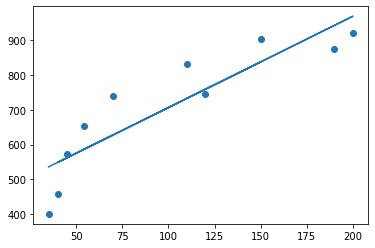

In [4]:
zp=zp.reshape(-1,1)
model = LinearRegression()
model.fit(zp, ks)
r_sq = model.score(zp, ks)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
plt.scatter(zp, ks)
plt.plot(zp,444.18+2.62*zp)
plt.show()

## Задание 2
```
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 
```

In [8]:
zp= np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks= np.array ([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

def mse_(b1, x = zp, y = ks, n = n):
    return np.sum((y - x*b1)**2)/ n

b1 = 0.1
alpha = 1e-6

for i in range(1300):
    b1-= alpha * (2/n) * np.sum((b1 * zp - ks) * zp)
    if i % 100 == 0:
        print(f'iteranion = {i} , B1 = {b1}, mse = {mse_(b1)}')

iteranion = 0 , B1 = 0.25952808, mse = 493237.7212546963
iteranion = 100 , B1 = 5.54537842245223, mse = 58151.31823171113
iteranion = 200 , B1 = 5.868748638669329, mse = 56522.97550129376
iteranion = 300 , B1 = 5.888531320728348, mse = 56516.88130936019
iteranion = 400 , B1 = 5.8897415574471985, mse = 56516.85850140053
iteranion = 500 , B1 = 5.889815595583751, mse = 56516.858416040064
iteranion = 600 , B1 = 5.889820124983314, mse = 56516.85841572062
iteranion = 700 , B1 = 5.889820402076462, mse = 56516.85841571941
iteranion = 800 , B1 = 5.88982041902807, mse = 56516.8584157194
iteranion = 900 , B1 = 5.889820420065112, mse = 56516.85841571941
iteranion = 1000 , B1 = 5.8898204201285544, mse = 56516.85841571941
iteranion = 1100 , B1 = 5.889820420132437, mse = 56516.85841571943
iteranion = 1200 , B1 = 5.889820420132673, mse = 56516.85841571943


## Задание 3*
```
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).
```

In [6]:
zp= np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks= np.array ([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b0, b1 = 0.0, 0.1
x = zp
y = ks
lr = 0.00001
epochs = 10000


# run 10000 times
for epoch in range(epochs):
    # initialize to 0 -> cost of epoch, Jb_0, Jb_1
    epoch_cost, cost_b0, cost_b1 = 0, 0, 0
    
    if epoch % 1000 == 0:
        print(f'iteranion = {epoch}, B0 = {b0}, B1 = {b1},  mse = {mse_(b1)}')

    for i in range(len(x)):
        # make prediction
        y_pred = (b0 + b1*x[i])
        # append squared error
        epoch_cost += (y[i] - y_pred)**2 
        
        for j in range(len(x)):
            # partial derivative of b0 and b1 for current row
            partial_wrt_b0 = -2 * (y[j] - (b0 + b1*x[j]))
            partial_wrt_b1 = (-2 * x[j]) * (y[j] - (b0 + b1*x[j]))
            
            # increase cost of coeffs
            cost_b0 += partial_wrt_b0
            cost_b1 += partial_wrt_b1

        # calculate new coeffs
        b0 = b0 - lr * cost_b0
        b1 = b1 - lr * cost_b1

iteranion = 0, B0 = 0.0, B1 = 0.1,  mse = 518336.326
iteranion = 1000, B0 = 416.9739392769393, B1 = 2.820768066553786,  mse = 186279.78830506577
iteranion = 2000, B0 = 442.5111378623459, B1 = 2.6328029943211275,  mse = 202661.27007909198
iteranion = 3000, B0 = 444.0753007632767, B1 = 2.621290063814135,  mse = 203696.2809379966
iteranion = 4000, B0 = 444.17110632207675, B1 = 2.6205848925432953,  mse = 203759.79443481113
iteranion = 5000, B0 = 444.17697444814826, B1 = 2.6205417005409584,  mse = 203763.68510539393
iteranion = 6000, B0 = 444.17733387305003, B1 = 2.6205390550147745,  mse = 203763.92341208275
iteranion = 7000, B0 = 444.17735588795836, B1 = 2.6205388929753135,  mse = 203763.93800846214
iteranion = 8000, B0 = 444.17735723637895, B1 = 2.6205388830503415,  mse = 203763.93890249534
iteranion = 9000, B0 = 444.1773573189705, B1 = 2.6205388824424314,  mse = 203763.9389572554


In [7]:
b0, b1

(444.1773573240287, 2.620538882405202)